# Eluvio Data Science Intern Challenge 

### Downloading and Importing the main libraries

In [1]:
!git clone https://github.com/bely66/reddit-upvotes

Cloning into 'reddit-upvotes'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 41 (delta 21), reused 31 (delta 13), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [2]:
cd reddit-upvotes/

/content/reddit-upvotes


In [3]:
!pip install detoxify textstat vaderSentiment

     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 133kB 26.6MB/s 
     |████████████████████████████████| 2.1MB 39.0MB/s 
     |████████████████████████████████| 1.2MB 56.3MB/s 
     |████████████████████████████████| 1.9MB 56.5MB/s 
     |████████████████████████████████| 3.3MB 55.3MB/s 
     |████████████████████████████████| 901kB 51.8MB/s 


In [4]:
!gdown --id 15X00ZWBjla7qGOIW33j8865QdF89IyAk

Downloading...
From: https://drive.google.com/uc?id=15X00ZWBjla7qGOIW33j8865QdF89IyAk
To: /content/reddit-upvotes/Eluvio_DS_Challenge.csv
82.2MB [00:01, 50.8MB/s]


In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt

import seaborn as sns


## Dataset Overview



In [ ]:
df = pd.read_csv("Eluvio_DS_Challenge.csv")

In [ ]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


We will print the values count of the author column in the table to see if their's shared authors

In [ ]:
for column in df.columns:
  if column == "author":
    print(f"{column} Values:")
    print(df[column].value_counts())

author Values:
davidreiss666       8897
anutensil           5730
DoremusJessup       5037
maxwellhill         4023
igeldard            4013
                    ... 
Miargus                1
Matt3r                 1
Jigglypigglypuff       1
CallFall               1
Wawerf3                1
Name: author, Length: 85838, dtype: int64


As we can see there's some authors who have more than 8k records <br>
After that we can check the statistics of our dataset.

In [ ]:
df.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0



As we can see there's no downvotes in the dataset so this columns is redundant, And 75% of the upvotes are below 16 the data is highly skewed to the right.
It would be beneficial if we used IQR scaler to remove these outliers.

---
Now let's look at an overview of our dataset like the datatypes of our columns and the memory taken by the dataset.






In [ ]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 186.8 MB


As we can see the data is taking up almost 200mb of memory which is a lot, We need to overcome this but first let's set a goal for our notebook.

## How can we use this data? 

After reading and searching a bit the data we have has titles of subreddits.
Knowing that we can use our information about subreddits to estimate our upvotes.


### Feature Engineering 
By adding more features from our knowledge of the dataset:

1. Readability using textstat library
2. Sentiment using NLTK Vader
3. the day of week comment was posted
4. subjectivity
5. word_count
6. char count
7. Toxicity score using detoxify library

### Supervised Learning problem

Estimating the number of up votes based on the title and/or the author name.

### Insights 
We can ask multiple questions: <br>
1- What's the relation between the authors and upvotes?<br>
2- What's the most controversial topics world wide?<br>





## Big Data Loading Methods
## 1. Compression 
Our data is taking up almost 200mb of our memory.
We can do the following:
1.   Remove un-necessary columns
2.   Convert float types into int
3.   Sample random samples from the data (Let's go with 4000)



In [184]:
df = pd.read_csv("Eluvio_DS_Challenge.csv", usecols=["up_votes", "title", "author", "date_created","over_18"], dtype={"up_votes":"int16"}).sample(4000)

In [8]:
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 391546 to 440113
Columns: 5 entries, date_created to author
dtypes: bool(1), int16(1), object(3)
memory usage: 1.2 MB


## Batching 
We can get the data in batches and draw statistics and train on it.
Using chunk_size argument in Pandas read_csv function.

### What's the relation between the authors and upvotes?


In [73]:
datafile = "Eluvio_DS_Challenge.csv"
chunksize = 2000
authors = {}
for i, df in enumerate(pd.read_csv(datafile, chunksize=chunksize, usecols=["up_votes", "author"])):
  df_by_author = df.groupby('author', as_index=False).sum().sort_values('up_votes', ascending=False)
  a = list(df['author'].value_counts().keys())
  c = list(df['author'].value_counts())
  c_ = []
  for a_ in df_by_author['author'] : 
      c_.append(c[a.index(a_)])

  df_by_author['total_posts'] = c_
  
  for j in range(len(df_by_author)):
    author = df_by_author.loc[j]["author"]
    up_votes = df_by_author.loc[j]["up_votes"]
    total_posts = df_by_author.loc[j]["total_posts"]
    if author in authors:
      authors[author]["up_votes"] +=  up_votes
      authors[author]["total_posts"] +=  total_posts
    
    else:
      authors[author] = {"up_votes":up_votes, "total_posts":total_posts}



In [95]:
df_author = pd.DataFrame(data=authors).T
df_author = df_author.sort_values(by="total_posts", ascending=False)
df_author.corr()

,up_votes,total_posts
up_votes,1.000000,0.699749
total_posts,0.699749,1.000000


In [96]:
df_author['avg_vote_per_post'] = df_author['up_votes']/df_author['total_posts']
df_author.corr()

,up_votes,total_posts,avg_vote_per_post
up_votes,1.000000,0.699749,0.074146
total_posts,0.699749,1.000000,-0.002423
avg_vote_per_post,0.074146,-0.002423,1.000000


As we can see there's a very small correlation between avg_number of posts of an author and the score who gets.

It can be very tricky to find a correlation between the high number of posts and the high upvotes because they compound.

In [160]:
number_of_h_p_h_v = len(df_author[(df_author["avg_vote_per_post"]>100) & (df_author["total_posts"]>200) ])
number_of_l_p_h_v = len(df_author[(df_author["avg_vote_per_post"]>100) & (df_author["total_posts"]<200) ])

In [161]:
number_of_h_p_h_v

97

In [162]:
number_of_l_p_h_v

11719

In [148]:
df_high_author.corr()

,up_votes,total_posts,avg_vote_per_post
up_votes,1.000000,0.948155,0.00671
total_posts,0.948155,1.000000,-0.04503
avg_vote_per_post,0.006710,-0.045030,1.00000


In [164]:
avg_vote = df_author.sort_values(by="avg_vote_per_post", ascending=False)
avg_vote

,up_votes,total_posts,avg_vote_per_post
navysealassulter,12333,1,12333.0
seapiglet,11288,1,11288.0
DawgsOnTopUGA,10515,1,10515.0
Flamo_the_Idiot_Boy,10289,1,10289.0
haunted_cheesecake,9408,1,9408.0
...,...,...,...
soysauce44,0,1,0.0
yesitisthathard,0,1,0.0
rbcrusaders,0,1,0.0
redsox6,0,1,0.0


### What's the most controversial topics worldwide?

In [166]:
from tqdm import tqdm
low_votes_tri_grams = {}
high_votes_tri_grams = {}

words = 3
datafile = "Eluvio_DS_Challenge.csv"
chunksize = 2000
authors = {}
for i, df in tqdm(enumerate(pd.read_csv(datafile, chunksize=chunksize, usecols=["title", "up_votes"]))):
  df_high = df[df["up_votes"]>100]
  df_low = df[df["up_votes"]<100]
  for title in df_low.title.values:
    words_tokens = nltk.word_tokenize(title)
    for i in range(len(words_tokens)-words):
        seq = ' '.join(words_tokens[i:i+words])
        if  seq not in low_votes_tri_grams.keys():
            low_votes_tri_grams[seq] = 1
        low_votes_tri_grams[seq] += 1

  for title in df_high.title.values:
    words_tokens = nltk.word_tokenize(title)
    for i in range(len(words_tokens)-words):
        seq = ' '.join(words_tokens[i:i+words])
        if  seq not in high_votes_tri_grams.keys():
            high_votes_tri_grams[seq] = 1
        high_votes_tri_grams[seq] += 1


0it [00:00, ?it/s]
1it [00:00,  4.37it/s]
2it [00:00,  4.31it/s]
3it [00:00,  4.18it/s]
4it [00:00,  4.08it/s]
5it [00:01,  3.99it/s]
6it [00:01,  4.00it/s]
7it [00:01,  3.98it/s]
8it [00:01,  4.00it/s]
9it [00:02,  3.92it/s]
10it [00:02,  3.90it/s]
11it [00:02,  3.84it/s]
12it [00:03,  3.78it/s]
13it [00:03,  3.76it/s]
14it [00:03,  3.81it/s]
15it [00:03,  3.76it/s]
16it [00:04,  3.75it/s]
17it [00:04,  3.72it/s]
18it [00:04,  3.67it/s]
19it [00:04,  3.60it/s]
20it [00:05,  3.58it/s]
21it [00:05,  3.41it/s]
22it [00:05,  3.30it/s]
23it [00:06,  3.24it/s]
24it [00:06,  3.19it/s]
25it [00:06,  3.15it/s]
26it [00:07,  3.16it/s]
27it [00:07,  3.13it/s]
28it [00:07,  3.14it/s]
29it [00:08,  3.14it/s]
30it [00:08,  3.12it/s]
31it [00:08,  3.11it/s]
32it [00:09,  3.16it/s]
33it [00:09,  3.06it/s]
34it [00:09,  3.03it/s]
35it [00:10,  3.04it/s]
36it [00:10,  3.04it/s]
37it [00:10,  3.03it/s]
38it [00:11,  3.11it/s]
39it [00:11,  3.16it/s]
40it [00:11,  3.25it/s]
41it [00:11,  3.29it/s]
42it 

In [238]:
high_votes_tri_grams = pd.DataFrame(high_votes_tri_grams, index=[0])


KeyboardInterrupt: ignored

In [241]:
high_votes_tri_grams = high_votes_tri_grams.T

In [243]:
high_votes_tri_grams = high_votes_tri_grams.sort_values(by=0, ascending=False)

In [245]:
high_votes_tri_grams.head(20)

,0
", according to",330
one of the,276
the world s,248
the United States,242
the country s,224
the first time,214
of the world,191
in the world,172
world ’ s,171
for the first,164


In [6]:
import importlib
import training_pipeline
import MLP
importlib.reload(training_pipeline)
importlib.reload(MLP)


Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt


<module 'MLP' from '/content/reddit-upvotes/MLP.py'>

In [7]:
from training_pipeline import train_upvotes, evaluate_model


In [8]:
datafile = "Eluvio_DS_Challenge.csv"
chunksize = 100
fine_tune = False
for i, df in enumerate(pd.read_csv(datafile, chunksize=chunksize, usecols=["up_votes", "title", "author", "date_created","over_18"])):
  msk = np.random.rand(len(df)) < 0.8
  train = df[msk]
  test = df[~msk]
  train_upvotes(train, i, fine_tune=fine_tune)
  evaluate_model(test)
  fine_tune = True


Feature Engineering The DataFrame
Adding Word Count Feature
Adding Char Count Feature
Adding Over 18 Feature
Adding Readability Score Feature
Adding Sentiment Score Feature
Adding Toxicity Score Feature


/content/reddit-upvotes/preprocessing_utils.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_count"] = df.title.apply(lambda x: len(x.split()))
/content/reddit-upvotes/preprocessing_utils.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char_count"] = df.title.apply(lambda x: len(x))
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Adding Subjectivity Score Feature
Adding Posted Day Feature
Adding Upper Score Ratio Feature
Dropping Un-necessary Tables

---------------------------

Building Regression Model

---------------------------

Training Regression Model
Starting epoch 1
Loss after mini-batch     1: 6.389
Starting epoch 2
Loss after mini-batch     1: 6.388
Starting epoch 3
Loss after mini-batch     1: 6.387
Starting epoch 4
Loss after mini-batch     1: 6.386
Starting epoch 5
Loss after mini-batch     1: 6.385
Training process has finished.


PicklingError: ignored

As we can see our data is taking only 1 mb of our ram, let's see if we lost some information

As we can see from the statistics the upvotes almost representing the original data.

## Feature Engineering and Exploration




In [170]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')

stopwords = set(stopwords.words('english'))

best_titles = df.sort_values(by='up_votes', ascending=False)['title'].values[:10]
best_words = set(np.concatenate([word_tokenize(t) for t in best_titles])) - stopwords
best_words = {word.lower() for word in best_words}
best_words = best_words - set(string.punctuation) - set(string.digits)

def is_float(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

best_words = {word for word in best_words if not is_float(word)}

best_words = {word for word in best_words if "'" not in word}  # drop contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [171]:
words_tokenized = [[w.lower() for w in word_tokenize(t)] for t in df['title']]
df['tokenized_title'] = words_tokenized
all_words = pd.Series(np.concatenate(words_tokenized)).value_counts()


In [172]:
all_words = all_words[[word not in stopwords for word in all_words.index]]
all_words = all_words[[word not in string.punctuation for word in all_words.index]]
all_words = all_words[[word not in string.digits for word in all_words.index]]
all_words = all_words[[not is_float(word) for word in all_words.index]]
all_words = all_words[["'" not in word for word in all_words.index]]

In [173]:
best_words

{'...',
 '5:59am',
 'access',
 'adds',
 'adequate',
 'adult',
 'affordable',
 'arrested',
 'assault',
 'barely',
 'becomes',
 'bill',
 'blocking',
 'bodies',
 'britain',
 'brits',
 'child',
 'combined',
 'confirm',
 'confirmed',
 'considers',
 'constitution',
 'conviction',
 'convictions',
 'cost',
 'crimes',
 'democracy',
 'dubai',
 'duty',
 'earthquake',
 'elon',
 'enshrining',
 'ensure',
 'ever',
 'everyone',
 'extra-marital',
 'extreme',
 'food',
 'force',
 'fukushima',
 'fundamental',
 'gang-raped',
 'government',
 'hits',
 'install',
 'isps',
 'japan',
 'law',
 'legally',
 'less',
 'likely',
 'magnitude',
 'married',
 'mean',
 'men',
 'mend',
 'meter',
 'move',
 'musk',
 'new',
 'normal',
 'november',
 'overturn',
 'passed',
 'president',
 'public',
 'putin',
 'rally',
 'report',
 'right',
 'roof',
 'russian',
 'says',
 'scotland',
 'secure',
 'sex',
 'sites',
 'slovenia',
 'solar',
 'sold',
 'surveillance',
 'tesla-solarcity',
 'thousands',
 'ties',
 'time',
 'trump',
 'tsunami'

In [14]:
best_titles

array(['UK admits it spied illegally for 17 years, is sorry, won t stop',
       'Four rangers that protect elephants in Africa killed by poachers.',
       '‘Alan Turing law’ unveiled by government will posthumously pardon thousands of gay men convicted of historic offences: The Enigma codebreaker s great neice says Government decision is  absolutely tremendous ',
       'Chinese troops head to border with North Korea',
       'German push to ban combustion-engine cars by 2030 wins support',
       'China halts trading as stocks fall 7%',
       ' It was satire, faux news  - Reports that Mexican drug leader El Chapo declared  war  on ISIS as run by NY Post, Forbes and Fox News have been proven false',
       'Britain is the most corrupt country in the world, claims mafia expert Roberto Saviano:  It’s not the bureaucracy, it’s not the police, it’s not the politics but what is corrupt is the financial capital ',
       'Malawi bans child marriage, lifts minimum age to 18',
       'Islam

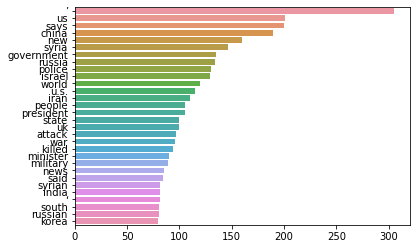

In [12]:
sns.barplot(x =all_words[:30].values, y=all_words[:30].index)

In [41]:
def get_category(votes):
  if votes < 10:
    return "low"
  elif votes > 10 and votes <120:
    return "moderate"
  
  elif votes > 120 and votes <500:
    return "high"

  elif votes > 500 and votes <2000:
    return "very_high"

  elif votes > 2000:
    return "above_average"

df["votes_category"] = df.up_votes.apply(lambda x: get_category(x))

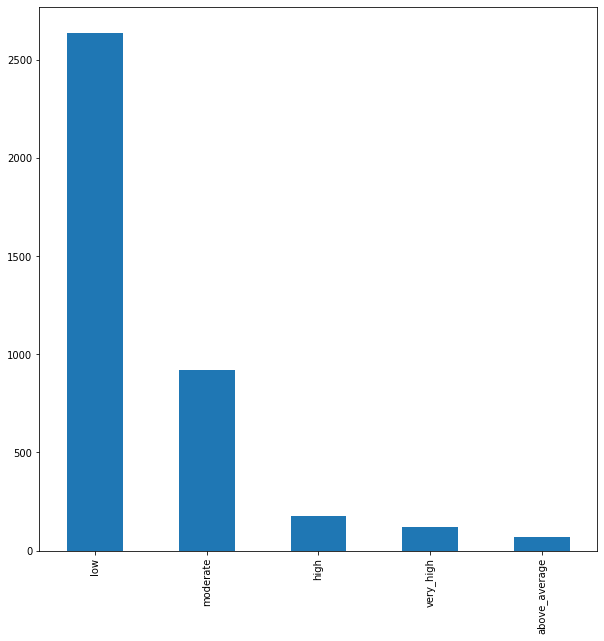

In [42]:
plt.figure(figsize=(10,10))
df['votes_category'].value_counts().plot(kind="bar")


In [185]:
df["word_count"] = df.title.apply(lambda x: len(x.split()))

In [186]:
def subjective(text):
  words = ["i", "my"]
  count = 0
  text = text.lower().split()
  for word in words:
    count += text.count(word)

  return count

In [187]:
df["subjectivity"] = df.title.apply(lambda x: subjective(x))

In [188]:
!pip install textstat


In [189]:
import textstat
textstat.set_lang("en")


In [190]:
df["readability_index"] = df.title.apply(lambda x: textstat.automated_readability_index(x))

In [191]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [192]:
analyser.polarity_scores("whatever it's")

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [193]:
df["neg_sentiment"] = df.title.apply(lambda x: analyser.polarity_scores(x).get("neg"))
df["pos_sentiment"] = df.title.apply(lambda x: analyser.polarity_scores(x).get("pos"))
df["neu_sentiment"] = df.title.apply(lambda x: analyser.polarity_scores(x).get("neu"))

In [194]:
import datetime
import calendar


def weekday_from_date(date):
  year, month, day = date.split("-")
  day_number = datetime.date(day=int(day), month=int(month), year=int(year)).weekday()
  return calendar.day_name[day_number]

In [195]:
weekday_from_date(df.date_created.values[20])

'Wednesday'

In [196]:
df["day_created"] = df.date_created.apply(lambda x: weekday_from_date(x))

day_dummies = pd.get_dummies(df.day_created, prefix='day')

df = pd.concat([df, day_dummies], axis=1)


In [197]:
def uppercase_ratio(text):
  res = list(filter(lambda c: c.isupper(), text))
  ratio = len(res)/len(text.replace(" ", ""))
  return ratio

In [198]:
df["uppercase_ratio"] = df.title.apply(lambda x: uppercase_ratio(x))

In [200]:
!pip install detoxify


In [201]:
from detoxify import Detoxify

# each model takes in either a string or a list of strings

toxicity_model = Detoxify('original')


Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt


In [ ]:
df["toxic"] = df.title.apply(lambda x: toxicity_model.predict(x).get("toxicity"))

In [202]:
df.columns

Index(['date_created', 'up_votes', 'title', 'over_18', 'author', 'word_count',
       'subjectivity', 'readability_index', 'neg_sentiment', 'pos_sentiment',
       'neu_sentiment', 'day_created', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'uppercase_ratio', 'up_votes_scaled'],
      dtype='object')

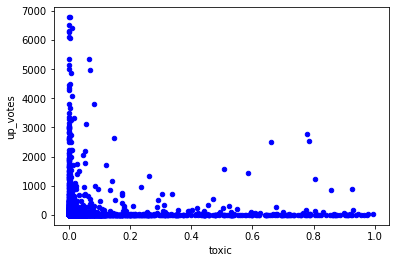

In [ ]:
ax2 = df.plot.scatter(x='toxic',
                      y='up_votes',
                      c='blue',
                      colormap='viridis')

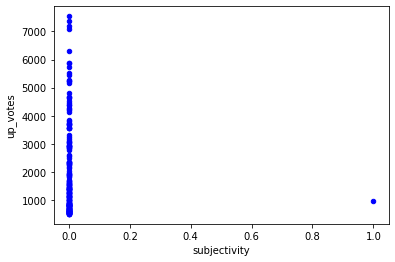

In [45]:
ax2 = high_votes_df.plot.scatter(x='subjectivity',
                      y='up_votes',
                      c='blue',
                      colormap='viridis')

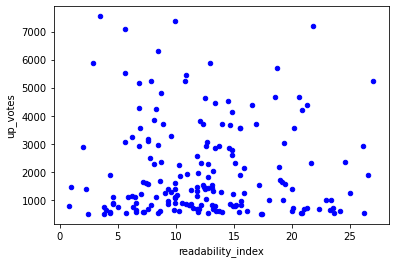

In [46]:
ax2 = high_votes_df.plot.scatter(x='readability_index',
                      y='up_votes',
                      c='blue',
                      colormap='viridis')

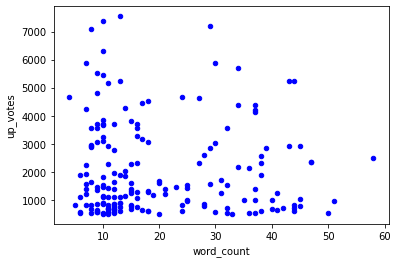

In [47]:
ax2 = high_votes_df.plot.scatter(x='word_count',
                      y='up_votes',
                      c='blue',
                      colormap='viridis')

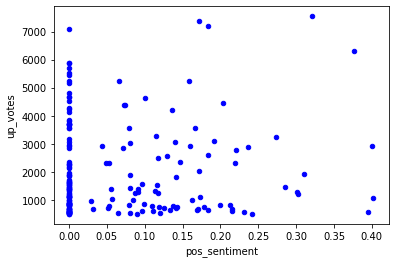

In [48]:
ax2 = high_votes_df.plot.scatter(x='pos_sentiment',
                      y='up_votes',
                      c='blue',
                      colormap='viridis')

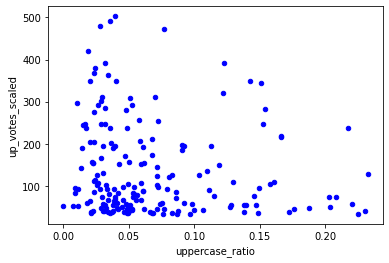

In [49]:
ax2 = high_votes_df.plot.scatter(x='uppercase_ratio',
                      y='up_votes_scaled',
                      c='blue',
                      colormap='viridis')

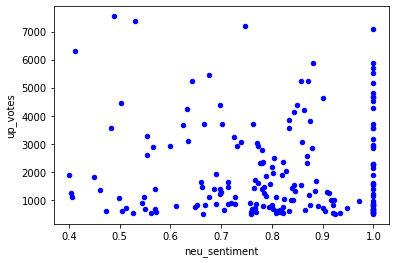

In [50]:
ax2 = high_votes_df.plot.scatter(x='neu_sentiment',
                      y='up_votes',
                      c='blue',
                      colormap='viridis')

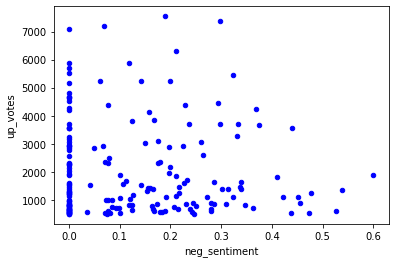

In [51]:
ax2 = high_votes_df.plot.scatter(x='neg_sentiment',
                      y='up_votes',
                      c='blue',
                      colormap='viridis')

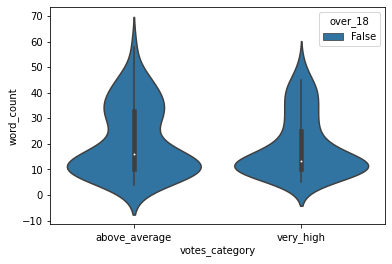

In [232]:
sns.violinplot(x="votes_category", y="word_count", hue="over_18", data=high_votes_df)

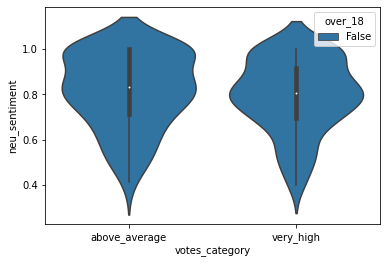

In [233]:
sns.violinplot(x="votes_category", y="neu_sentiment", hue="over_18", data=high_votes_df)

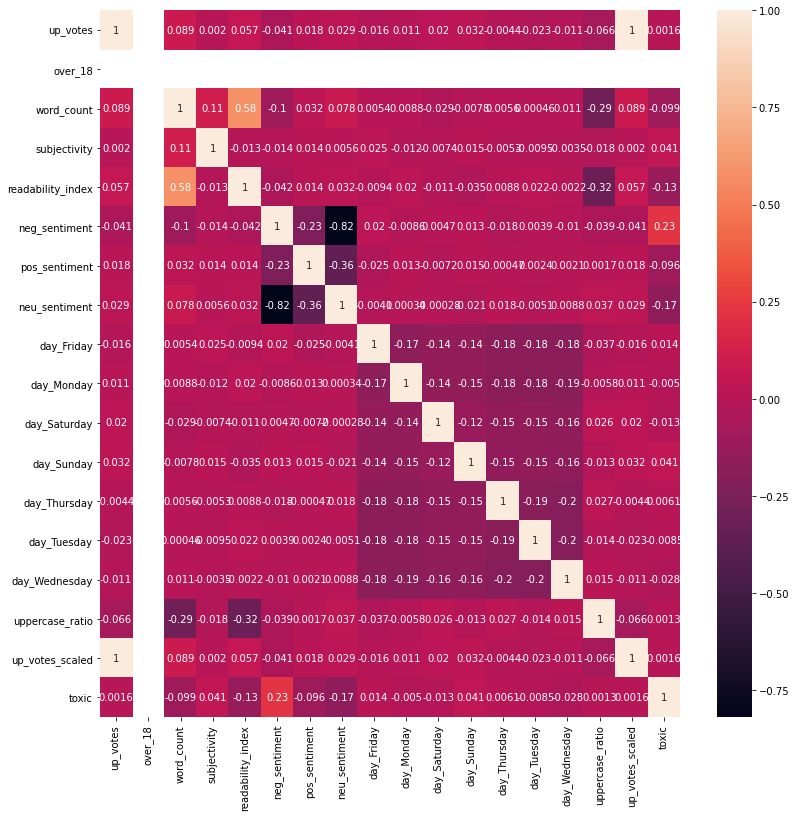

In [ ]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True)

## Data Cleaning and Visualization

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
df['title'] = \
df['title'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['title'] = \
df['title'].map(lambda x: x.lower())
# Print out the first rows of papers
df['title'].head()

256860    settlers bulldoze palestinian lands near nablu...
383606    high court rules uk data retention and surveil...
110654    china and india: rival middle east strategies ...
306292     shariah police  ditch vests and change name: ...
480094    syria s war: 50 killed in daesh attack in qami...
Name: title, dtype: object

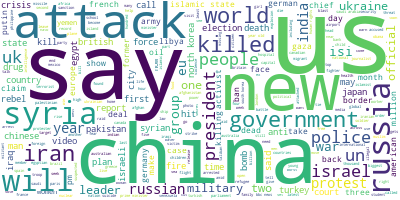

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Classification Text Vs Features

In [216]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score


clfs = {"NeuralNetwork":MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(128, 64, 32), random_state=1), 
        "RidgeClassifierCV":RidgeClassifierCV(),
        "RandomForestClassifier":RandomForestClassifier()}

def evaluate_clfs(x_train, x_valid, y_train, y_valid, clfs):
  for name, clf in clfs.items():
    print(f"Training {name} Classifier...")

    clf.fit(x_train, y_train)
    print(f"Evaluating {name} Classifier:")
    curr_preds = clf.predict(x_valid)
    
    print(f"Accuracy for {name}:{accuracy_score(curr_preds, y_valid)}")

    print(f"F1_score for {name}:{f1_score(curr_preds, y_valid)}")


    try:
      importance = clf.coef_
      # summarize feature importance
      print("\n --------------------------- \n")
      for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (df_columns[i],v))
    except:
      print("Classifier doesn't have feature importance")

    else:
      importance = clf.coef_
      # summarize feature importance
      for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (df_columns[i],v))

    print("\n\n --------------------------- \n\n")


In [228]:
df_training = df[df["up_votes"]<500]
df_training["votes_cat"] = df_training.up_votes.apply(lambda x: 1 if x > 8 else 0)
df_processed = df_training.drop(["up_votes", "up_votes_scaled", "title", "date_created", "author", "day_created", "votes_cat"], axis=1)

labels = df_training.votes_cat.values
df_columns = df_processed.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

#using only word features
data_tran = vectorizer.fit_transform(df_training.title.values).toarray()
Xtrain, Xvalid, ytrain, ytest = train_test_split(data_tran, labels, test_size=0.2)
evaluate_clfs(Xtrain, Xvalid, ytrain, ytest, clfs)

Training NeuralNetwork Classifier...
Evaluating NeuralNetwork Classifier:
Accuracy for NeuralNetwork:0.8928104575163399
F1_score for NeuralNetwork:0.0
Classifier doesn't have feature importance


 --------------------------- 


Training RidgeClassifierCV Classifier...
Evaluating RidgeClassifierCV Classifier:
Accuracy for RidgeClassifierCV:0.9254901960784314
F1_score for RidgeClassifierCV:0.0

 --------------------------- 

Classifier doesn't have feature importance


 --------------------------- 


Training RandomForestClassifier Classifier...
Evaluating RandomForestClassifier Classifier:
Accuracy for RandomForestClassifier:0.9254901960784314
F1_score for RandomForestClassifier:0.0
Classifier doesn't have feature importance


 --------------------------- 




In [221]:
# using min max scaler
scaler = MinMaxScaler()

df_processed = scaler.fit_transform(df_processed)
Xtrain, Xvalid, ytrain, ytest = train_test_split(df_processed, labels, test_size=0.2)
evaluate_clfs(Xtrain, Xvalid, ytrain, ytest, clfs)

Training NeuralNetwork Classifier...


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Evaluating NeuralNetwork Classifier:
Accuracy for NeuralNetwork:0.9464052287581699
F1_score for NeuralNetwork:0.0
Classifier doesn't have feature importance


 --------------------------- 


Training RidgeClassifierCV Classifier...
Evaluating RidgeClassifierCV Classifier:
Accuracy for RidgeClassifierCV:0.9464052287581699
F1_score for RidgeClassifierCV:0.0

 --------------------------- 

Classifier doesn't have feature importance


 --------------------------- 


Training RandomForestClassifier Classifier...
Evaluating RandomForestClassifier Classifier:
Accuracy for RandomForestClassifier:0.9464052287581699
F1_score for RandomForestClassifier:0.0
Classifier doesn't have feature importance


 --------------------------- 




In [229]:
# using robust scaler
scaler = RobustScaler()

df_processed = scaler.fit_transform(df_processed)

Xtrain, Xvalid, ytrain, ytest = train_test_split(df_processed, labels, test_size=0.2)
evaluate_clfs(Xtrain, Xvalid, ytrain, ytest, clfs)


Training NeuralNetwork Classifier...


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Evaluating NeuralNetwork Classifier:
Accuracy for NeuralNetwork:0.592156862745098
F1_score for NeuralNetwork:0.37096774193548393
Classifier doesn't have feature importance


 --------------------------- 


Training RidgeClassifierCV Classifier...
Evaluating RidgeClassifierCV Classifier:
Accuracy for RidgeClassifierCV:0.673202614379085
F1_score for RidgeClassifierCV:0.22839506172839505

 --------------------------- 

Classifier doesn't have feature importance


 --------------------------- 


Training RandomForestClassifier Classifier...
Evaluating RandomForestClassifier Classifier:
Accuracy for RandomForestClassifier:0.6549019607843137
F1_score for RandomForestClassifier:0.3333333333333333
Classifier doesn't have feature importance


 --------------------------- 


